In [1]:
import pandas
pandas.__version__

'1.3.4'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import time

In [6]:
import sklearn.metrics as m

In [7]:
conda install -c glemaitre imbalanced-learn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Note: you may need to restart the kernel to use updated packages.



Examining python=3.9:  80%|########  | 4/5 [00:00<00:00,  4.16it/s]              
                                                                   

Examining conflict for imbalanced-learn python:   0%|          | 0/5 [00:00<?, ?it/s]
                                                                                     

UnsatisfiableError: The following specifications were found



Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed


to be incompatible with the existing python installation in your environment:

Specifications:

  - imbalanced-learn -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.9

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





In [8]:
!pip install imblearn

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
import imblearn

In [11]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
#Load Data
my_dataset=pd.read_csv("my_dataset.csv")

In [14]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600100 entries, 0 to 600099
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   IPV4_SRC_ADDR               600100 non-null  object 
 1   L4_SRC_PORT                 600100 non-null  int64  
 2   IPV4_DST_ADDR               600100 non-null  object 
 3   L4_DST_PORT                 600100 non-null  int64  
 4   PROTOCOL                    600100 non-null  int64  
 5   L7_PROTO                    600100 non-null  float64
 6   IN_BYTES                    600100 non-null  int64  
 7   OUT_BYTES                   600100 non-null  int64  
 8   IN_PKTS                     600100 non-null  int64  
 9   OUT_PKTS                    600100 non-null  int64  
 10  TCP_FLAGS                   600100 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  600100 non-null  int64  
 12  Label                       600100 non-null  int64  
 13  Attack        

In [15]:
my_dataset.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.100.6,52670,192.168.100.1,53,17,5.212,71,126,1,1,0,4294966,0,Benign
1,192.168.100.6,49160,192.168.100.149,4444,6,0.000,217753000,199100,4521,4049,24,4176249,1,Theft
2,192.168.100.46,3456,192.168.100.5,80,17,0.000,8508021,8918372,9086,9086,0,4175916,0,Benign
3,192.168.100.3,80,192.168.100.55,8080,6,7.000,8442138,9013406,9086,9086,0,4175916,0,Benign
4,192.168.100.46,80,192.168.100.5,80,6,7.000,8374706,0,9086,0,0,4175916,0,Benign


In [16]:
drop_cols = []
for i in my_dataset.columns:
    if len(my_dataset[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
my_dataset.drop(drop_cols, 1, inplace=True)

Total columns with only 1 unique value: 0


In [17]:
my_dataset.dropna(1,inplace=True)

In [18]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600100 entries, 0 to 600099
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   IPV4_SRC_ADDR               600100 non-null  object 
 1   L4_SRC_PORT                 600100 non-null  int64  
 2   IPV4_DST_ADDR               600100 non-null  object 
 3   L4_DST_PORT                 600100 non-null  int64  
 4   PROTOCOL                    600100 non-null  int64  
 5   L7_PROTO                    600100 non-null  float64
 6   IN_BYTES                    600100 non-null  int64  
 7   OUT_BYTES                   600100 non-null  int64  
 8   IN_PKTS                     600100 non-null  int64  
 9   OUT_PKTS                    600100 non-null  int64  
 10  TCP_FLAGS                   600100 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  600100 non-null  int64  
 12  Label                       600100 non-null  int64  
 13  Attack        

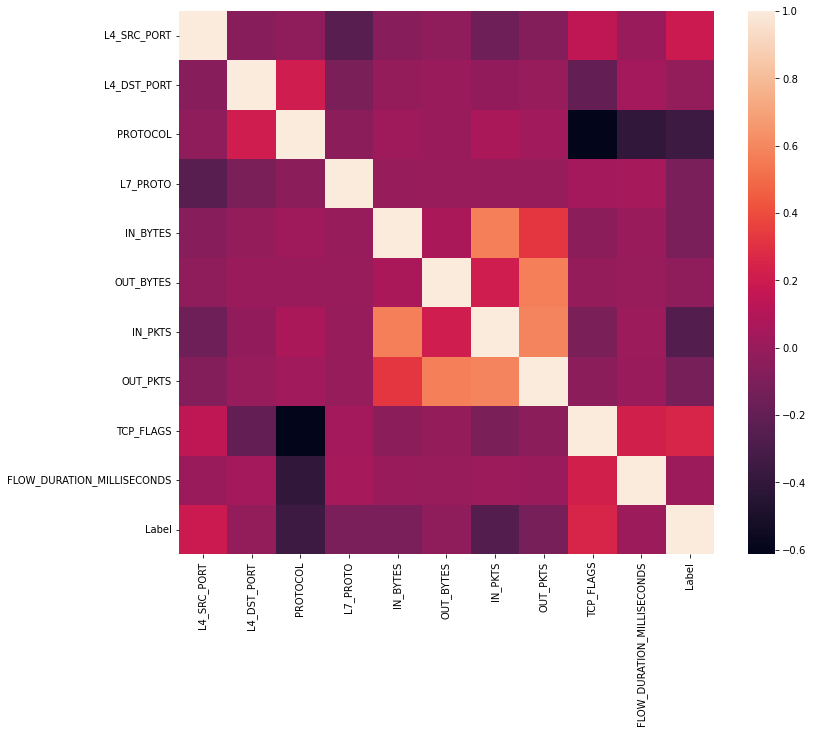

In [19]:
my_dataset= my_dataset.dropna('columns')# drop columns with NaN

my_dataset= my_dataset[[col for col in my_dataset if my_dataset[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = my_dataset.corr()

plt.figure(figsize=(12,10))

sns.heatmap(corr)

plt.show()

In [20]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(my_dataset,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
count,180030.000000,180030.000000,180030.00000,180030.000000,1.800300e+05,1.800300e+05,180030.000000,180030.000000,180030.000000,1.800300e+05,180030.000000
mean,46550.677265,7975.248192,6.58182,8.989024,8.570278e+03,4.940851e+03,12.543276,5.736005,21.865861,3.475628e+06,0.976693
std,12016.939538,14132.240182,2.55893,35.045190,2.221175e+05,3.913169e+05,245.665646,169.866978,8.108470,1.660000e+06,0.150878
min,0.000000,0.000000,1.00000,0.000000,2.800000e+01,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,39210.000000,80.000000,6.00000,0.000000,4.400000e+01,4.000000e+01,1.000000,1.000000,22.000000,4.278545e+06,1.000000
50%,47892.000000,1875.000000,6.00000,0.000000,4.400000e+01,4.000000e+01,1.000000,1.000000,22.000000,4.294966e+06,1.000000
75%,55307.000000,8009.000000,6.00000,7.000000,1.120000e+02,4.000000e+01,2.000000,1.000000,22.000000,4.294967e+06,1.000000
max,65535.000000,65535.000000,17.00000,244.000000,9.519928e+06,1.513069e+08,9598.000000,13807.000000,214.000000,4.294967e+06,1.000000


In [21]:
# Packet Attack Distribution
train['Label'].value_counts()
test['Label'].value_counts()

1    175834
0      4196
Name: Label, dtype: int64

In [22]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))


In [24]:
# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [25]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 

In [26]:
# creating one hot encoder object 
onehotencoder = OneHotEncoder() 

In [27]:
trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [28]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

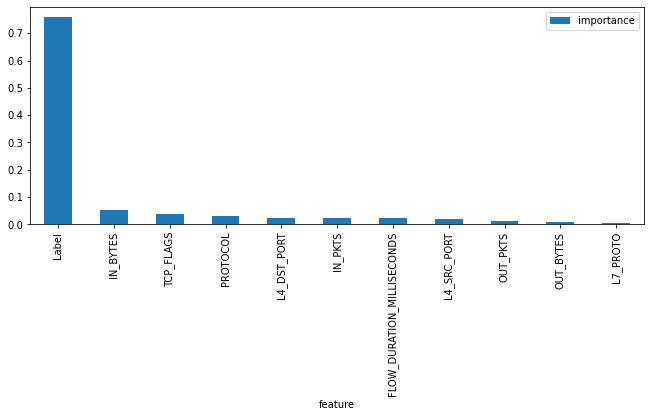

In [29]:
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_X, train_y);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [30]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(train_X, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

a = [i[0] for i in feature_map]
train_X = train_X.iloc[:,a]
test_X = test_X.iloc[:,a]

In [31]:
#Dataset Partition
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_y,train_size=0.70, random_state=2)

#Fitting Models
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [32]:
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

In [33]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

In [34]:
# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

BernoulliNB()

In [35]:
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
# Train SVM
SVM_Classifier = SVC(gamma = 'scale')
SVM_Classifier.fit(X_train, Y_train)

SVC()

In [40]:
#Evaluate Models
from sklearn import metrics
models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('Support Vector Machine', SVM_Classifier))

for i, v in models:
    start_time = time.time()
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    MAE = metrics.mean_absolute_error(Y_train, v.predict(X_train))
    R2_Score = metrics.r2_score(Y_train, v.predict(X_train))
    F1_Score = metrics.f1_score(Y_train, v.predict(X_train))
    end_time = time.time()
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    print("Mean Absolute Error:" "\n", MAE) 
    print()
    print("R2_score:" "\n", R2_Score ) 
    print()
    print("F1_score:" "\n", F1_Score ) 
    print()
    print("Testing time: ",end_time-start_time)
    print()
    


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9995714991321899

Model Accuracy:
 0.9995714999880972

Confusion matrix:
 [[287157    126]
 [     0   6766]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    287283
         1.0       0.98      1.00      0.99      6766

    accuracy                           1.00    294049
   macro avg       0.99      1.00      1.00    294049
weighted avg       1.00      1.00      1.00    294049


Mean Absolute Error:
 0.0004285000119027781

R2_score:
 0.9809388837022489

F1_score:
 0.9907746375750476

Testing time:  3.2134618759155273


============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 1.0

Model Accuracy:
 1.0

Confusion matrix:
 [[287283      0]
 [     0   6766]]

Classification report:
               preci

In [41]:
#Validate Models
for i, v in models:
    start_time = time.time()
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    MAE = metrics.mean_absolute_error(Y_test, v.predict(X_test))
    R2_Score = metrics.r2_score(Y_test, v.predict(X_test))
    F1_Score = metrics.f1_score(Y_test, v.predict(X_test))
    end_time = time.time()
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    print("Mean Absolute Error:" "\n", MAE)  
    print()
    print("R2_score:" "\n", R2_Score ) 
    print()
    print("F1_score:" "\n", F1_Score ) 
    print()
    print("Testing time: ",end_time-start_time)
    print()


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.9994921481340412

Confusion matrix:
 [[123060     64]
 [     0   2897]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    123124
         1.0       0.98      1.00      0.99      2897

    accuracy                           1.00    126021
   macro avg       0.99      1.00      0.99    126021
weighted avg       1.00      1.00      1.00    126021


Mean Absolute Error:
 0.0005078518659588482

R2_score:
 0.9773883797007189

F1_score:
 0.98907476954592

Testing time:  0.4402647018432617


============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 1.0

Confusion matrix:
 [[123124      0]
 [     0   2897]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    

<BarContainer object of 6 artists>

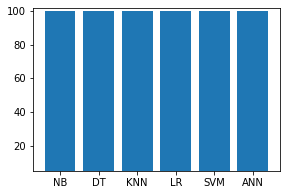

In [48]:
#Accuracy BarChart of Evaluation Models
names = ['NB','DT','KNN','LR','SVM','ANN']
values = [99.95,100.00,99.99,100.00,100.00,100.00]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(5,102)
plt.bar(names,values)

<BarContainer object of 6 artists>

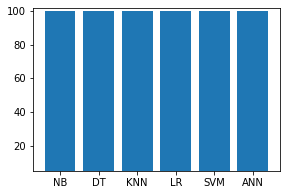

In [52]:
#Accuracy BarChart of Validation Models
names = ['NB','DT','KNN','LR','SVM','ANN']
values = [99.99,100.00,100.00,100.00,99.99,100.00]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(5,102)
plt.bar(names,values)

<BarContainer object of 6 artists>

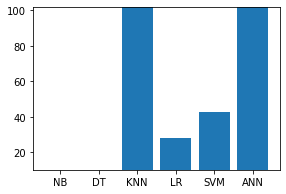

In [49]:
#BarChart of Training Time on Evaluating the Models 
names = ['NB','DT','KNN','LR','SVM','ANN']
values = [3.213,3.0338,3133.770,27.888,42.535,114.953]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(10,102)
plt.bar(names,values)

<BarContainer object of 6 artists>

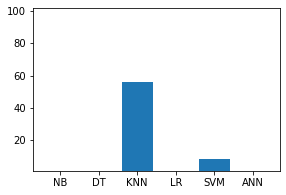

In [51]:
#BarChart of Test Time on Validating the Models 
names = ['NB','DT','KNN','LR','SVM','ANN']
values = [0.440,0.346,55.761,0.319,8.354,0.9023]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(10,102)
plt.bar(names,values)